In [1]:
# Load the dataset, get the desired values only.
# Make the points into categorical data
# USe smoot
# train 
# evaluate.

# 'protocol'
# 'flow_duration'
# 'tot_fwd_pkts'
# 'tot_bwd_pkts'
# 'totlen_fwd_pkts'
# 'totlen_bwd_pkts'
# 'fwd_pkt_len_mean'
# 'fwd_pkt_len_std'
# 'bwd_pkt_len_mean'
# 'flow_byts_s'
# 'flow_pkts_s'
# 'flow_iat_std'
# 'flow_iat_min'
# 'fwd_iat_tot'
# 'fwd_iat_min'
# 'bwd_iat_tot'
# 'bwd_iat_min'
# 'fwd_psh_flags'
# 'fwd_urg_flags'
# 'bwd_pkts_s'
# 'fin_flag_cnt'
# 'rst_flag_cnt'
# 'psh_flag_cnt'
# 'ack_flag_cnt'
# 'urg_flag_cnt'
# 'down_up_ratio'
# 'init_fwd_win_byts'
# 'init_bwd_win_byts'
# 'fwd_seg_size_min'
# 'active_mean'
# 'idle_mean'


# label

In [2]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('bruteforce-web-xss_sql-injection_23-02-2018.csv')
data.head()

,dst_port,protocol,timestamp,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,...,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,22,6,23/02/2018 08:18:29,1532698,11,11,1179,1969,648,0,...,32,0.0,0.0,0,0,0.0,0.000000e+00,0,0,Benign
1,500,17,23/q02/2018 08:17:45,117573855,3,0,1500,0,500,500,...,8,0.0,0.0,0,0,58786927.5,2.375324e+07,75583006,41990849,Benign
2,500,17,23/02/2018 08:17:45,117573848,3,0,1500,0,500,500,...,8,0.0,0.0,0,0,58786924.0,2.375325e+07,75583007,41990841,Benign
3,22,6,23/02/2018 08:19:55,1745392,11,11,1179,1969,648,0,...,32,0.0,0.0,0,0,0.0,0.000000e+00,0,0,Benign
4,500,17,23/02/2018 08:18:17,89483474,6,0,3000,0,500,500,...,8,4000364.0,0.0,4000364,4000364,21370777.5,1.528092e+07,41989576,7200485,Benign


In [4]:
data['label'].value_counts()

label
Benign              1048009
Brute Force -Web        362
Brute Force -XSS        151
SQL Injection            53
Name: count, dtype: int64

In [5]:
cols = [
    'protocol',
'flow_duration',
'tot_fwd_pkts',
'tot_bwd_pkts',
'totlen_fwd_pkts',
'totlen_bwd_pkts',
'fwd_pkt_len_mean',
'fwd_pkt_len_std',
'bwd_pkt_len_mean',
'flow_byts_s',
'flow_pkts_s',
'flow_iat_std',
'flow_iat_min',
'fwd_iat_tot',
'fwd_iat_min',
'bwd_iat_tot',
'bwd_iat_min',
'fwd_psh_flags',
'fwd_urg_flags',
'bwd_pkts_s',
'fin_flag_cnt',
'rst_flag_cnt',
'psh_flag_cnt',
'ack_flag_cnt',
'urg_flag_cnt',
'down_up_ratio',
'init_fwd_win_byts',
'init_bwd_win_byts',
'fwd_seg_size_min',
'active_mean',
'idle_mean',
'label'
]

In [6]:
df_new = data[cols]
df_new

,protocol,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_mean,fwd_pkt_len_std,bwd_pkt_len_mean,flow_byts_s,...,psh_flag_cnt,ack_flag_cnt,urg_flag_cnt,down_up_ratio,init_fwd_win_byts,init_bwd_win_byts,fwd_seg_size_min,active_mean,idle_mean,label
0,6,1532698,11,11,1179,1969,107.181818,196.245162,179.00,2053.894505,...,1,0,0,1,29200,230,32,0.0,0.0,Benign
1,17,117573855,3,0,1500,0,500.000000,0.000000,0.00,12.757938,...,0,0,0,0,-1,-1,8,0.0,58786927.5,Benign
2,17,117573848,3,0,1500,0,500.000000,0.000000,0.00,12.757939,...,0,0,0,0,-1,-1,8,0.0,58786924.0,Benign
3,6,1745392,11,11,1179,1969,107.181818,196.245162,179.00,1803.606296,...,1,0,0,1,29200,230,32,0.0,0.0,Benign
4,17,89483474,6,0,3000,0,500.000000,0.000000,0.00,33.525744,...,0,0,0,0,-1,-1,8,4000364.0,21370777.5,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,6,85992425,2,0,0,0,0.000000,0.000000,0.00,0.000000,...,0,1,0,0,62569,-1,20,0.0,85992425.0,Benign
1048571,6,132,2,0,0,0,0.000000,0.000000,0.00,0.000000,...,0,1,0,0,258,-1,20,0.0,0.0,Benign
1048572,17,79134,1,1,41,98,41.000000,0.000000,98.00,1756.514267,...,0,0,0,1,-1,-1,8,0.0,0.0,Benign
1048573,6,10053785,11,12,1321,1659,120.090909,197.116440,138.25,296.405782,...,1,0,0,1,8192,62856,20,0.0,0.0,Benign


In [7]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

In [8]:
df_new['protocol'] = LE.fit_transform(df_new['protocol'])
df_new['label'] = LE.fit_transform(df_new['label'])

/var/folders/ld/bwffsrf52mnfq4_gy_k9p9480000gn/T/ipykernel_47411/3086081652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['protocol'] = LE.fit_transform(df_new['protocol'])
/var/folders/ld/bwffsrf52mnfq4_gy_k9p9480000gn/T/ipykernel_47411/3086081652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['label'] = LE.fit_transform(df_new['label'])


In [9]:
df_new['protocol'].value_counts()

protocol
1    740107
2    292401
0     16067
Name: count, dtype: int64

In [10]:
threshold = pd.to_numeric(np.finfo(np.float64).max)

# Remove rows with any value greater than float64
df_new = df_new[(df_new <= threshold).all(axis=1)]

print("DataFrame after removing rows with any value greater than float64:")
print(df_new)

DataFrame after removing rows with any value greater than float64:
         protocol  flow_duration  tot_fwd_pkts  tot_bwd_pkts  totlen_fwd_pkts  \
0               1        1532698            11            11             1179   
1               2      117573855             3             0             1500   
2               2      117573848             3             0             1500   
3               1        1745392            11            11             1179   
4               2       89483474             6             0             3000   
...           ...            ...           ...           ...              ...   
1048570         1       85992425             2             0                0   
1048571         1            132             2             0                0   
1048572         2          79134             1             1               41   
1048573         1       10053785            11            12             1321   
1048574         1         566835          

In [11]:
columns_with_na = df_new.columns[df_new.isna().any()].tolist()
print("Columns with NaN values:", columns_with_na)

Columns with NaN values: []


In [12]:
df_new = df_new.dropna()

In [13]:
columns_with_na = df_new.columns[df_new.isna().any()].tolist()
print("Columns with NaN values:", columns_with_na)

Columns with NaN values: []


/var/folders/ld/bwffsrf52mnfq4_gy_k9p9480000gn/T/ipykernel_47411/2687928747.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df_new['label']).plot.bar()


label
0    1042301
1        362
2        151
3         53
Name: count, dtype: int64

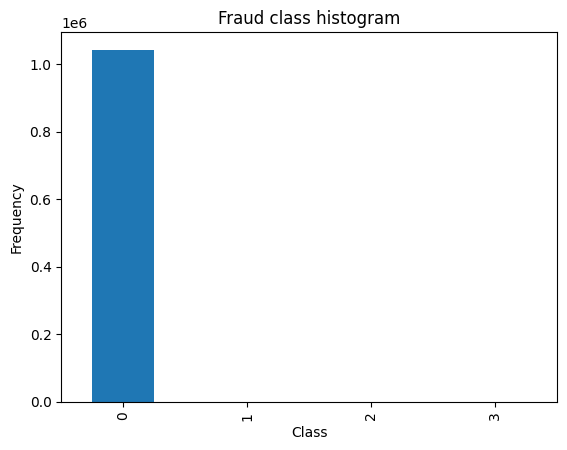

In [14]:
pd.value_counts(df_new['label']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
df_new['label'].value_counts()

In [16]:
cols_x = [
    'protocol',
'flow_duration',
'tot_fwd_pkts',
'tot_bwd_pkts',
'totlen_fwd_pkts',
'totlen_bwd_pkts',
'fwd_pkt_len_mean',
'fwd_pkt_len_std',
'bwd_pkt_len_mean',
'flow_byts_s',
'flow_pkts_s',
'flow_iat_std',
'flow_iat_min',
'fwd_iat_tot',
'fwd_iat_min',
'bwd_iat_tot',
'bwd_iat_min',
'fwd_psh_flags',
'fwd_urg_flags',
'bwd_pkts_s',
'fin_flag_cnt',
'rst_flag_cnt',
'psh_flag_cnt',
'ack_flag_cnt',
'urg_flag_cnt',
'down_up_ratio',
'init_fwd_win_byts',
'init_bwd_win_byts',
'fwd_seg_size_min',
'active_mean',
'idle_mean'
]

In [17]:
X = np.array(df_new[cols_x])
y = np.array(df_new['label'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (1042867, 31)
Shape of y: (1042867,)


In [18]:
df_new

,protocol,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_mean,fwd_pkt_len_std,bwd_pkt_len_mean,flow_byts_s,...,psh_flag_cnt,ack_flag_cnt,urg_flag_cnt,down_up_ratio,init_fwd_win_byts,init_bwd_win_byts,fwd_seg_size_min,active_mean,idle_mean,label
0,1,1532698,11,11,1179,1969,107.181818,196.245162,179.00,2053.894505,...,1,0,0,1,29200,230,32,0.0,0.0,0
1,2,117573855,3,0,1500,0,500.000000,0.000000,0.00,12.757938,...,0,0,0,0,-1,-1,8,0.0,58786927.5,0
2,2,117573848,3,0,1500,0,500.000000,0.000000,0.00,12.757939,...,0,0,0,0,-1,-1,8,0.0,58786924.0,0
3,1,1745392,11,11,1179,1969,107.181818,196.245162,179.00,1803.606296,...,1,0,0,1,29200,230,32,0.0,0.0,0
4,2,89483474,6,0,3000,0,500.000000,0.000000,0.00,33.525744,...,0,0,0,0,-1,-1,8,4000364.0,21370777.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1,85992425,2,0,0,0,0.000000,0.000000,0.00,0.000000,...,0,1,0,0,62569,-1,20,0.0,85992425.0,0
1048571,1,132,2,0,0,0,0.000000,0.000000,0.00,0.000000,...,0,1,0,0,258,-1,20,0.0,0.0,0
1048572,2,79134,1,1,41,98,41.000000,0.000000,98.00,1756.514267,...,0,0,0,1,-1,-1,8,0.0,0.0,0
1048573,1,10053785,11,12,1321,1659,120.090909,197.116440,138.25,296.405782,...,1,0,0,1,8192,62856,20,0.0,0.0,0


In [146]:
df_new['label'].value_counts()

label
0    1042301
1        362
2        151
3         53
Name: count, dtype: int64

In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_t, X_v, y_t, y_v = train_test_split(X_train, y_train, test_size=0.2)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (834293, 31)
Number transactions y_train dataset:  (834293,)
Number transactions X_test dataset:  (208574, 31)
Number transactions y_test dataset:  (208574,)


In [22]:
print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '2': {}".format(sum(y_train==2)))
print("Before OverSampling, counts of label '3': {}".format(sum(y_train==3)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_t, y_t.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res==2)))
print("After OverSampling, counts of label '3': {}".format(sum(y_train_res==3)))

Before OverSampling, counts of label '0': 833849
Before OverSampling, counts of label '1': 285
Before OverSampling, counts of label '2': 115
Before OverSampling, counts of label '3': 44
After OverSampling, the shape of train_X: (2668324, 31)
After OverSampling, the shape of train_y: (2668324,) 

After OverSampling, counts of label '0': 667081
After OverSampling, counts of label '1': 667081
After OverSampling, counts of label '2': 667081
After OverSampling, counts of label '3': 667081


In [23]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [24]:
xgb_model = xgb.XGBClassifier()

In [25]:
parameters = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [50, 100]
}

In [26]:
clf = GridSearchCV(xgb_model, parameters, cv=2, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV 1/2] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.921 total time=  31.5s
[CV 2/2] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.921 total time=  31.7s
[CV 1/2] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.937 total time=  58.3s
[CV 1/2] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.984 total time=  39.0s
[CV 2/2] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.936 total time=  57.6s
[CV 2/2] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.982 total time=  37.6s
[CV 1/2] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.980 total time=  31.3s
[CV 1/2] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.984 total time= 1.2min
[CV 2/2] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.980 total time=  30.5s
[CV 2/2] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.985 total t

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=3,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             verbose=5)

In [27]:
clf.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [28]:
y_pred = clf.predict(X_v)


In [29]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, y_v)
acc

0.9974109877201709

In [32]:
y_test_pred = clf.predict(X_test)
acc = accuracy_score(y_test_pred, y_test)
acc

0.9973294849789524

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_test, y_test_pred)


array([[207902,    489,     36,     25],
       [     1,     75,      0,      1],
       [     0,      0,     35,      1],
       [     0,      3,      1,      5]])

In [35]:
y_t.size


667434

In [36]:
y_v.size

166859

In [37]:
y_test.size

208574

In [38]:
clf

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=3,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             verbose=5)

In [39]:
from joblib import dump, load


In [53]:
dump(clf, "bruteforce-web-xss_sql-injection_23-02-2018new.joblib")

['bruteforce-web-xss_sql-injection_23-02-2018new.joblib']

In [54]:
loaded_clf = load("bruteforce-web-xss_sql-injection_23-02-2018new.joblib")

In [55]:
loaded_clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
current_row = X_test[0]

In [57]:
current_row = current_row.reshape(1, -1)

In [58]:
prediction = loaded_clf.predict(current_row)
print(prediction)

[0]


In [59]:
mis = 0
for i in range(len(X_test)):

    current_row = X_test[i]
    current_row = current_row.reshape(1, -1)
    prediction = loaded_clf.predict(current_row)
    actual = y_test[i]
    if prediction[0] != actual :
        mis+=1
        print(i, prediction, actual)
print(mis)
    

62 [1] 0
323 [3] 0
944 [1] 0
1370 [1] 0
2005 [3] 0
2256 [1] 0
3452 [1] 0
3461 [1] 0
4054 [1] 0
4068 [1] 0
4837 [1] 0
4850 [1] 0
4961 [1] 0
5286 [1] 0
5782 [1] 0
5890 [2] 0
7040 [3] 0
7288 [1] 0
7676 [3] 0
7861 [2] 0
7863 [1] 0
7888 [1] 0
7916 [2] 0
7929 [1] 0
8097 [1] 0
8379 [1] 0
8778 [3] 0
9220 [1] 0
9321 [2] 0
9406 [1] 0
9860 [1] 0
9895 [1] 0
10400 [1] 0
11361 [1] 0
12309 [1] 0
12460 [1] 0
12501 [1] 0
12614 [1] 0
12927 [1] 0
14063 [1] 3
14370 [1] 0
14403 [1] 0
15102 [1] 0
15501 [1] 0
15687 [1] 0
15792 [1] 0
16336 [2] 0
16690 [3] 0
16813 [1] 0
16850 [2] 0
17147 [1] 0
17260 [1] 0
17626 [1] 0
17844 [1] 0
17862 [1] 0
18052 [1] 0
18199 [1] 0
18205 [1] 0
18212 [1] 0
19444 [1] 0
20011 [1] 0
20016 [1] 0
21049 [2] 0
21281 [1] 0
22853 [1] 0
24779 [1] 0
24800 [1] 0
24994 [1] 3
25107 [1] 0
25111 [1] 0
26027 [1] 0
26810 [1] 0
27478 [1] 0
27935 [1] 0
28598 [1] 0
28620 [1] 0
28664 [2] 0
29207 [1] 0
29463 [1] 0
29521 [1] 0
29572 [1] 0
29630 [1] 0
30106 [3] 0
30384 [1] 0
30506 [2] 0
30802 [1] 0
3093

In [60]:
print(mis)

557


In [61]:
label_encodings = LE.classes_
print("Label Encodings:")
for label, encoding in zip(label_encodings, range(len(label_encodings))):
    print(f"{label}: {encoding}")

# Print the predicted labels

Label Encodings:
Benign: 0
Brute Force -Web: 1
Brute Force -XSS: 2
SQL Injection: 3
